In [1]:
import numpy as np
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Merge CSVs
While creating Datetime and UnixTime column

In [2]:
# use glob to get all the csv files in the folder
csv_files = glob.glob(os.path.join('./Data/0620-/', "*.csv")) #path

main_df = pd.DataFrame()
starttimes = []
display(main_df)
# loop over the list of csv files
for f in csv_files:
      
    # read the csv file
    df = pd.read_csv(f, comment="#")
      
    #grabs starttime from comment in the csv
    starttimedf = pd.read_csv(f, nrows = 0)
    starttime = starttimedf.columns[0][14:]
    starttime = pd.to_datetime(starttime).strftime('%s.%f')[:-3]
    starttime = float(starttime)
    
    #makes datetime column
    df.insert(loc=0, column='UnixTime', value = (df['Time (sec)'] + starttime)) #Epoch time
    df.insert(loc=0, column='Datetime', value = (df['Time (sec)'] + starttime)) 
    df['Datetime'] = pd.to_datetime(df['Datetime'], unit='s', utc = True).map(
        lambda x: x.tz_convert('America/Los_Angeles'))
    df['Datetime'] = df['Datetime'].dt.round('ms')
    #converts to datetime, rounds, timezones
    
    starttimes.append(df.iloc[(df[' Ambient air temperature (°F)'].ne(0).idxmax()), 1]) 
    #keeps track of starttime for each CSV, used later for xticks
    
    if main_df.empty:
        main_df = df
    else:
        main_df = pd.concat([main_df, df])

pd.set_option('display.max_columns', None)
main_df.head(3)  

""


,Datetime,UnixTime,Time (sec),Instant fuel economy (MPG),Total fuel economy (MPG),Fuel rate (gal/hr),Instant CO2 rate (lb/mile),Total CO2 (lbs),CO2 flow (lb/min),Engine RPM (RPM),Mass air flow rate (lb/min),Absolute load value (%),Mass air flow rate (lb/min).1,Engine Power (hp),Calculated load value (%),Time since engine start (sec),Ambient air temperature (°F),Intake manifold absolute pressure (inHg),Fuel system 1 status,Trip Distance (miles),Trip Fuel (gal),Trip Fuel Economy (MPG),Trip Duration (min),Ambient Temperature Sensor (°F),Blower Motor Speed Level,Compressor Speed (RPM),Compressor Target Speed (RPM),Room Temperature Sensor (°F),Engine Speed (RPM),Initial Intake Air Temperature (°F),Intake Air (°F),Hybrid battery pack remaining life (%),Traction Battery Pack Performance Retention Rate (%),Boost (psi),Acceleration (ft/s²),Vehicle Speed (MPH),Adjusted Ambient Temperature (°F),Motor Actual Current (A),Motor Power Supply Voltage (V),Battery Voltage (V),Aircon Consumption Power (kW),Battery Block Max Voltage (V),Cooling Fan 0 (%),Status of the Aircon Gate Status / OFF or ON,Battery Voltage (V).1,Status of the Engine Condition/ Stop or Run,Engine fuel rate (gal/hr),Driver's demand engine - percent torque (%),Actual engine - percent torque (%),Status of the Remote A/C Power Supply Request/ OFF or ON,Fuel injection timing (deg),Enhanced Hybrid/EV Charging State,Engine Torque (lb•ft),Set Temperature (Driver Side) (°F),Solar Sensor (Driver Side),Solar Ventilation Switch,Fuel Input (gal),Vehicle Load (%),Calculate Load (%),Total Weight Information (lbs)
0,2023-06-20 11:54:05.606000-07:00,1.687287e+09,0.000,0.0000,0.00000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0
1,2023-06-20 11:54:05.606000-07:00,1.687287e+09,0.000,0.0000,0.00000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0
2,2023-06-20 11:54:06.608000-07:00,1.687287e+09,1.002,407.9984,37.80165,0.0,0.048029,0.0,0.0,0.0,0.034398,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0


# Data Cleaning

In [3]:
df = main_df
pd.set_option('display.max_columns', None) #shows all the columns

df.columns = df.columns.str.lstrip(' ') #removes a random space char in front of column names
df = df.loc[:, (df != 0).any(axis=0)] #removes all columns that have only zeros in them
df = df[df['Ambient air temperature (°F)'] != 0] #removes initial rows that don't contain any data

df.reset_index(drop = True, inplace=True)

print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45741 entries, 0 to 45740
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype                              
---  ------                                        --------------  -----                              
 0   Datetime                                      45741 non-null  datetime64[ns, America/Los_Angeles]
 1   UnixTime                                      45741 non-null  float64                            
 2   Time (sec)                                    45741 non-null  float64                            
 3   Instant fuel economy (MPG)                    45741 non-null  float64                            
 4   Total fuel economy (MPG)                      45741 non-null  float64                            
 5   Fuel rate (gal/hr)                            45741 non-null  float64                            
 6   Instant CO2 rate (lb/mile)                    45741 non-null  

Sort Data by Datetime

<Axes: >

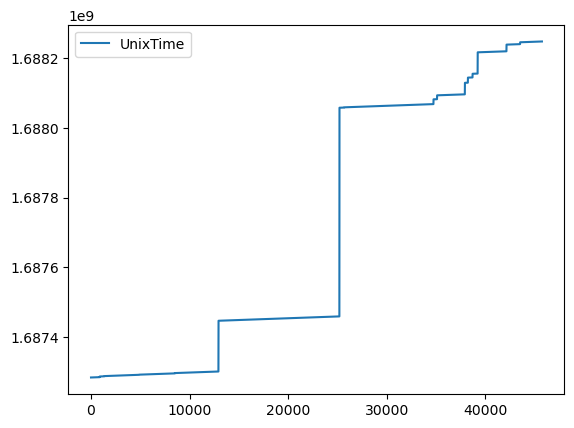

In [4]:
df.sort_values(by='Datetime', inplace = True)
df.reset_index(drop = True, inplace=True)
df.plot(y='UnixTime', use_index=True)

### Make a merged CSV file new cleaned data

In [5]:
with open('./Data/Merged/merged.csv', 'w') as csv_file:
    df.to_csv(path_or_buf=csv_file, index=False)

Adds up columns that should be culmulative

In [6]:
#def accumulate_column(colName):
#    trip_gap = list(df[df[colName].diff() < 0].index)
#    trip_gap.append(len(df.index))
#    for index, x in enumerate(trip_gap[:-1]):
#        df.loc[x:trip_gap[int(index+1)]-1, colName] += (df.loc[x-1, colName])

In [7]:
#accumulate_column('Trip Distance (miles)')
#df['Trip Distance (miles)'].plot()

# Set up xticks

In [8]:
#finds the indices where csv files were concated, along with corresponding datetime
indices = []
datetimes = []

starttimes.sort()
for x in starttimes:
    idx = df.index[df['UnixTime'] == x][0]
    indices.append(idx)
    datetimes.append(df.iloc[idx, 0].strftime('%m/%d, %H:%M:%S'))

<module 'matplotlib.pyplot' from '/Users/nathand/anaconda3/lib/python3.10/site-packages/matplotlib/pyplot.py'>

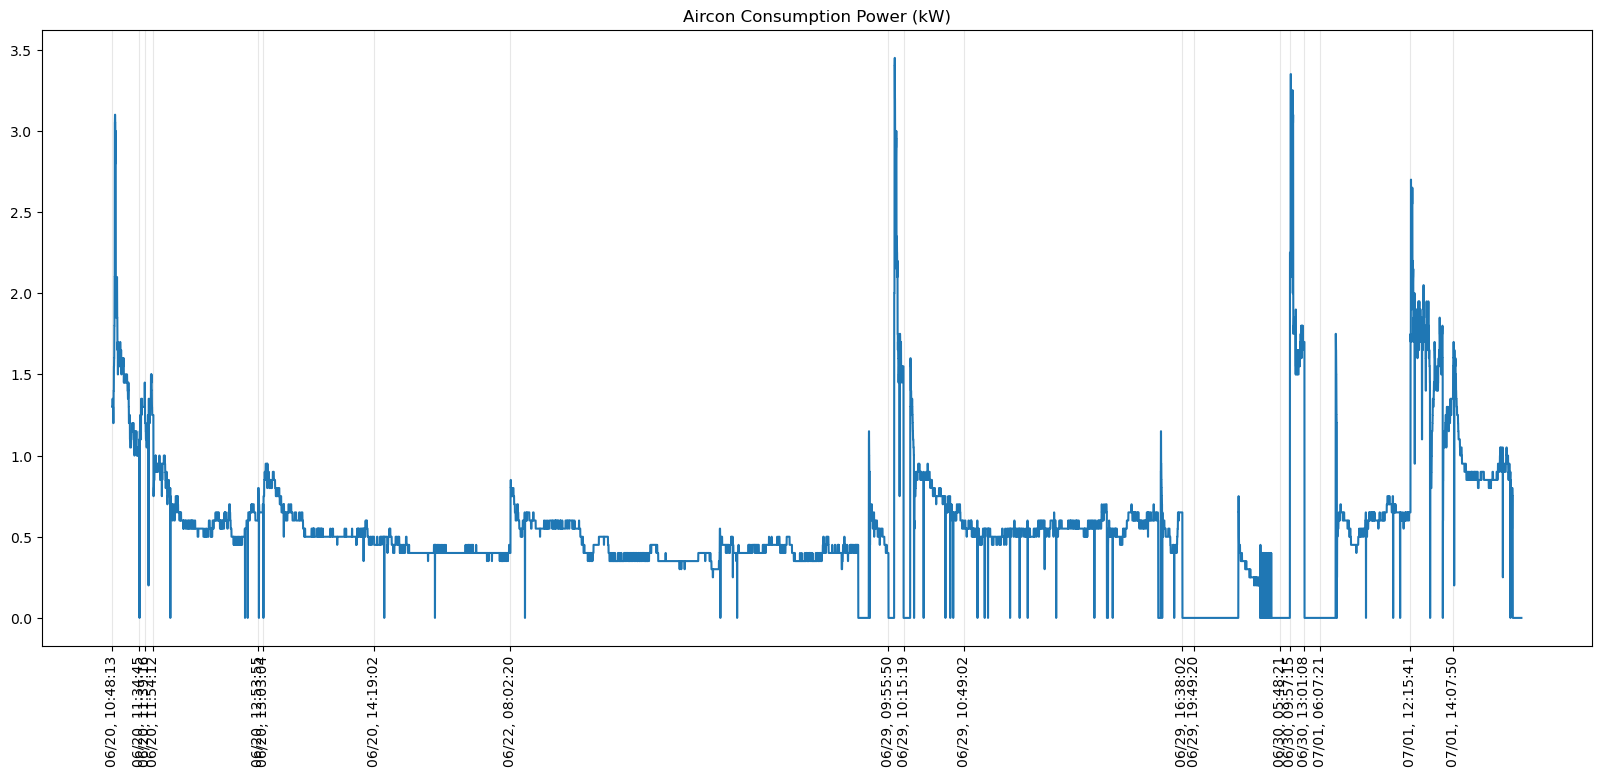

In [9]:
#using indices and datetimes to properly plot graphs with xticks
plt.figure(figsize=(20, 8))
plt.plot(df.index, df[['Aircon Consumption Power (kW)']])
plt.xticks(indices, datetimes, rotation = 90)
plt.grid(True, axis='x', alpha=.3)
plt.title('Aircon Consumption Power (kW)')
display(plt)

# Data Resampling

In [10]:
# creates resampled dataframes
df.set_index('Datetime', inplace = True)

df_1min = df.resample('1min').mean().round(3).reset_index() #1 min resample
df_5min = df.resample('5min').mean().round(3).reset_index() #5 min resample
df_10min = df.resample('10min').mean().round(3).reset_index() #10 min resample

df.reset_index(inplace=True)

In [11]:
# removes blank rows and makes indices for easier xticks
df_1min.dropna(axis=0, inplace=True) #skip over gap days
df_1min.reset_index(inplace=True)
df_1min_indices = np.array(indices)/(len(df.index)/len(df_1min.index))

df_5min.dropna(axis=0, inplace=True) #skip over gap days
df_5min.reset_index(inplace=True)
df_5min_indices = np.array(indices)/(len(df.index)/len(df_5min.index))

df_10min.dropna(axis=0, inplace=True) #skip over gap days
df_10min.reset_index(inplace=True)
df_10min_indices = np.array(indices)/(len(df.index)/len(df_10min.index))

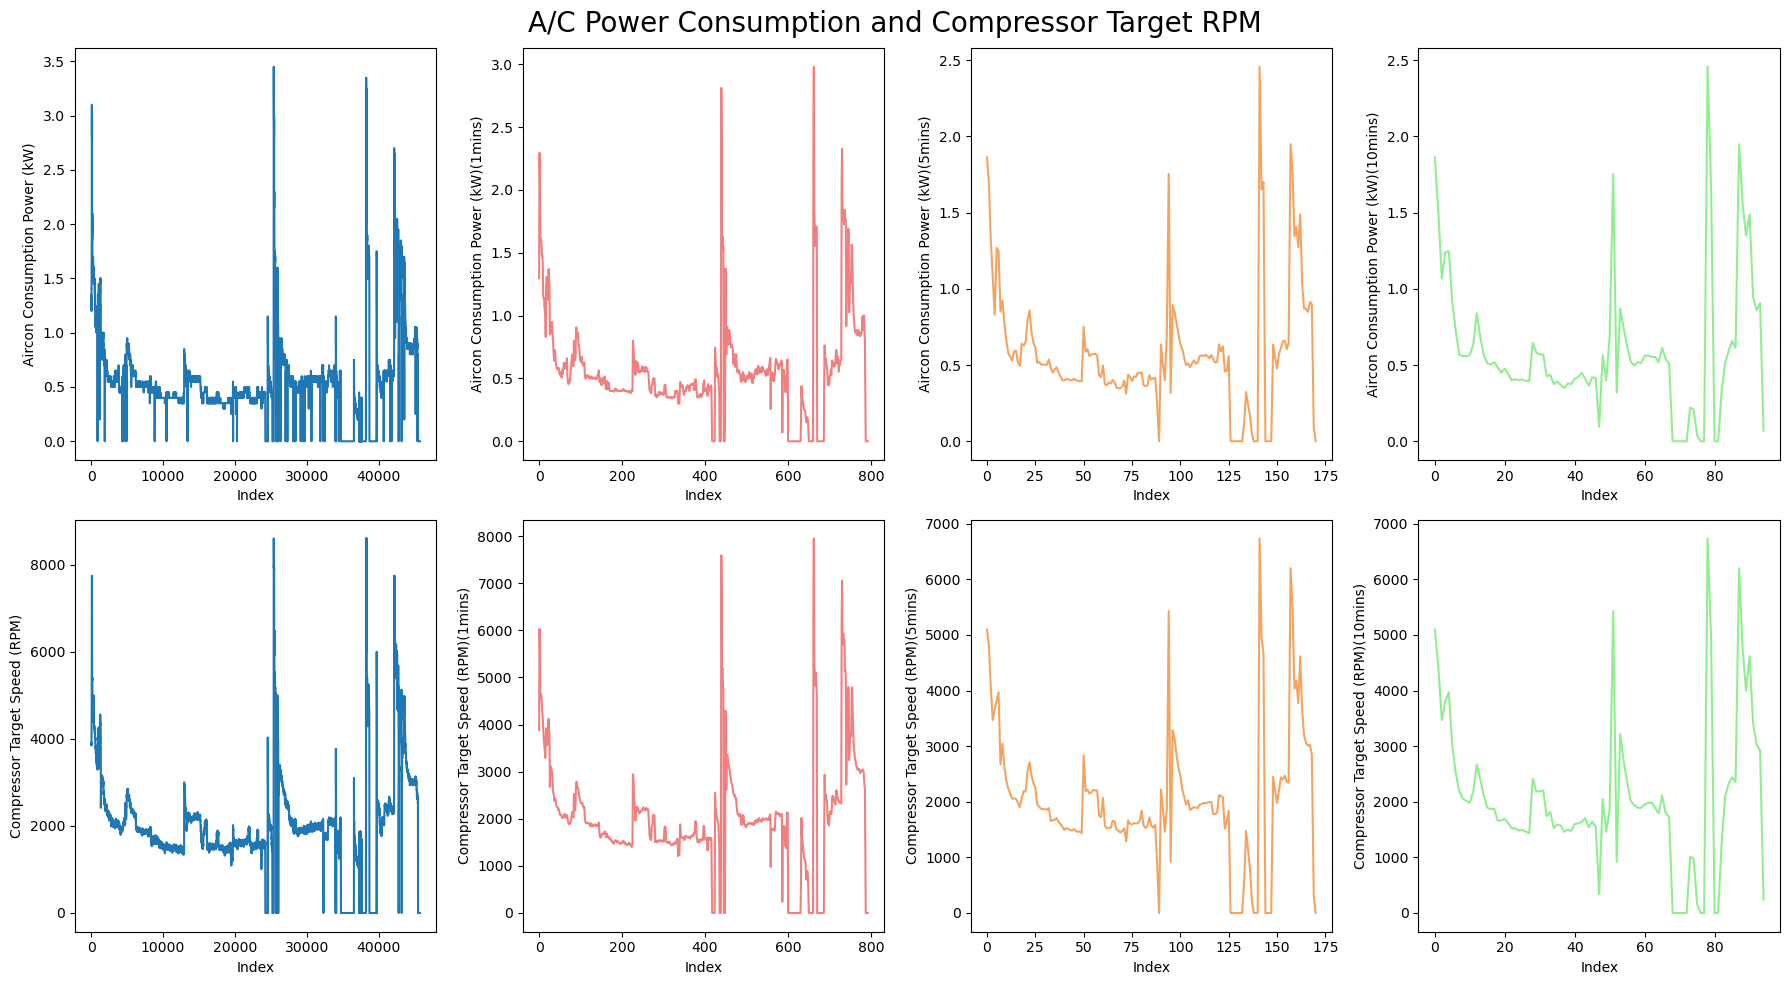

In [12]:
fig, axes = plt.subplots(2, 4, figsize = (18, 10), tight_layout = True)

# Time Vs A/C Energy Consumption
axes[0,0].plot(df.index, df[['Aircon Consumption Power (kW)']])
axes[0,0].set(ylabel='Aircon Consumption Power (kW)')

axes[0,1].plot(df_1min.index, df_1min[['Aircon Consumption Power (kW)']], color = 'lightcoral')
axes[0,1].set(ylabel='Aircon Consumption Power (kW)(1mins)')

axes[0,2].plot(df_5min.index, df_5min[['Aircon Consumption Power (kW)']], color = 'sandybrown')
axes[0,2].set(ylabel='Aircon Consumption Power (kW)(5mins)')

axes[0,3].plot(df_10min.index, df_10min[['Aircon Consumption Power (kW)']], color = 'lightgreen')
axes[0,3].set(ylabel='Aircon Consumption Power (kW)(10mins)')

# Time Vs Compressor Target Speed 
axes[1,0].plot(df.index, df[['Compressor Target Speed (RPM)']])
axes[1,0].set(ylabel='Compressor Target Speed (RPM)')

axes[1,1].plot(df_1min.index, df_1min[['Compressor Target Speed (RPM)']], color = 'lightcoral')
axes[1,1].set(ylabel='Compressor Target Speed (RPM)(1mins)')

axes[1,2].plot(df_5min.index, df_5min[['Compressor Target Speed (RPM)']], color = 'sandybrown')
axes[1,2].set(ylabel='Compressor Target Speed (RPM)(5mins)')

axes[1,3].plot(df_10min.index, df_10min[['Compressor Target Speed (RPM)']], color = 'lightgreen')
axes[1,3].set(ylabel='Compressor Target Speed (RPM)(10mins)')

fig.suptitle('A/C Power Consumption and Compressor Target RPM', fontsize = 20)
for ax in axes.flat:
    ax.set(xlabel='Index')

# EDA

## Correlations

/var/folders/bk/r8h1pz8j37q6rwlctszz75jc0000gn/T/ipykernel_41425/389082155.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ac_corr = df.corr()[['Aircon Consumption Power (kW)']].sort_values(by='Aircon Consumption Power (kW)', ascending=False)


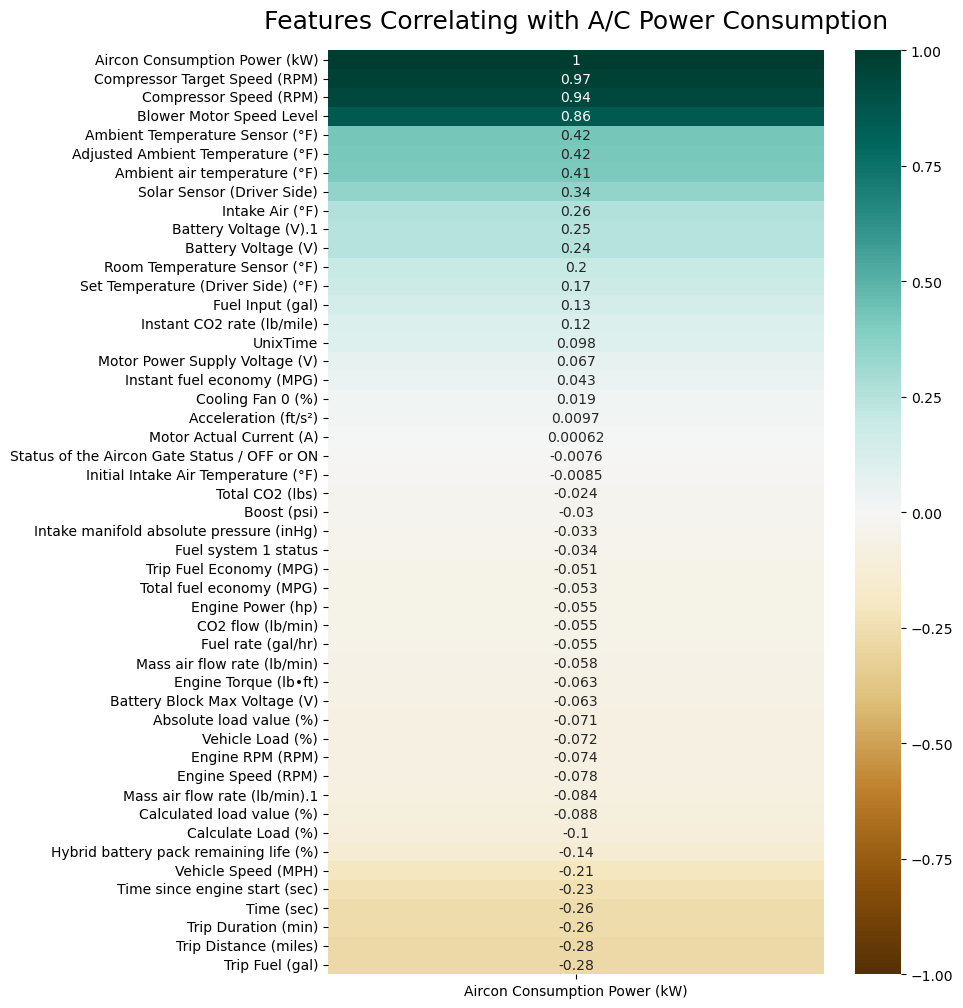

In [13]:
ac_corr = df.corr()[['Aircon Consumption Power (kW)']].sort_values(by='Aircon Consumption Power (kW)', ascending=False)

plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(ac_corr, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with A/C Power Consumption', fontsize = 18, pad=16);
#plt.savefig("singleheatmat.png", bbox_inches='tight') 

/var/folders/bk/r8h1pz8j37q6rwlctszz75jc0000gn/T/ipykernel_41425/1756672255.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


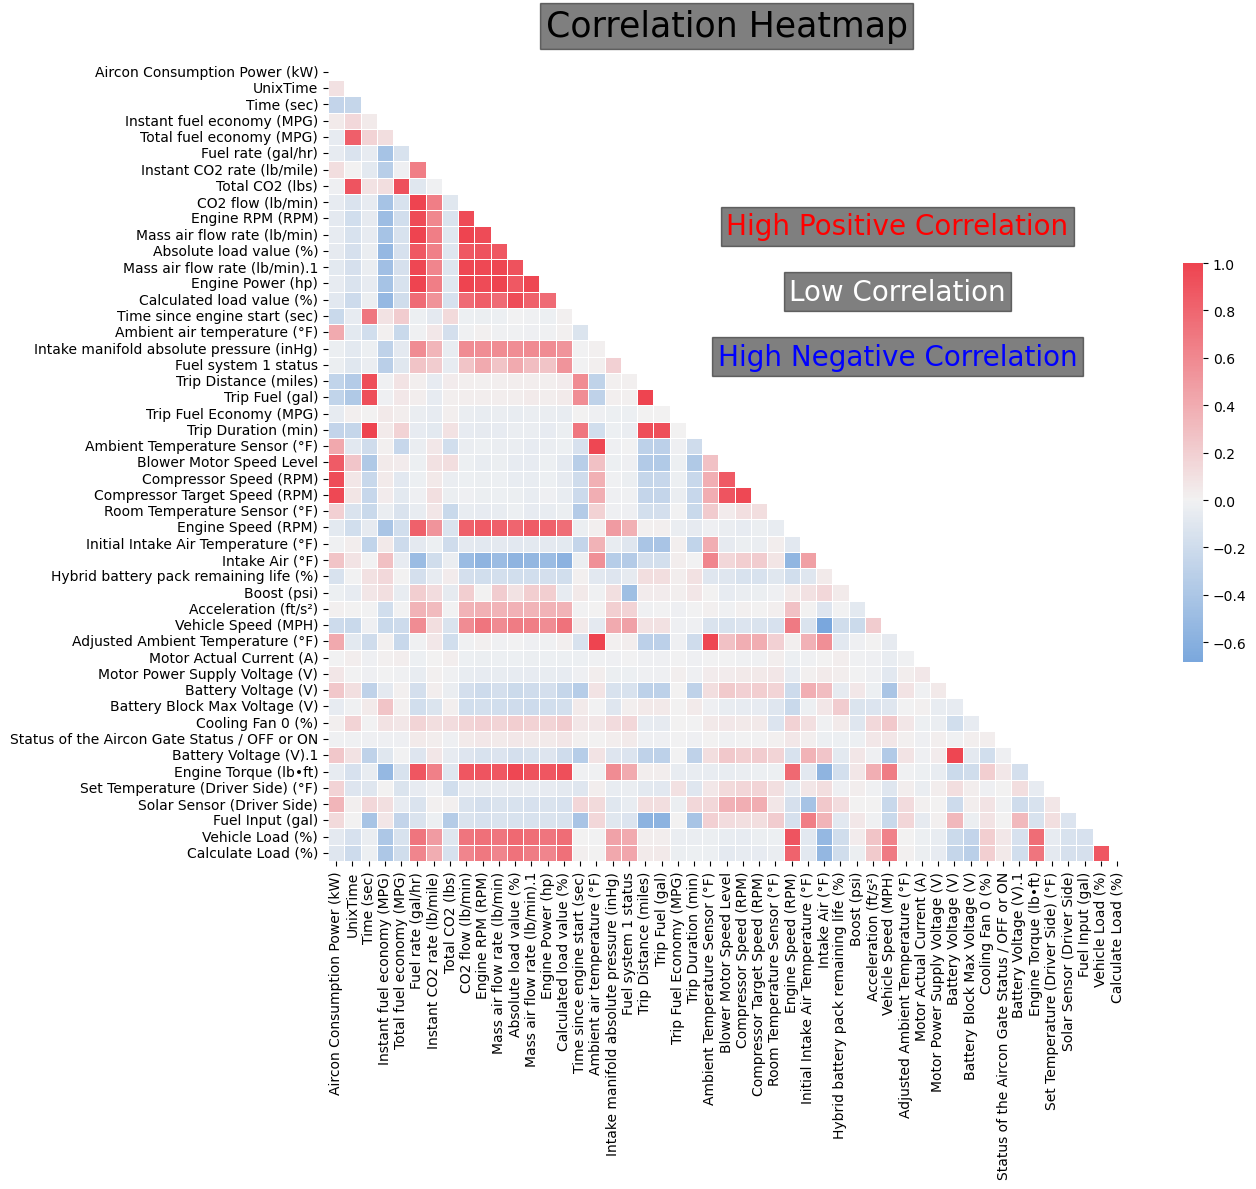

In [14]:
# correlation heatmap
df = df[['Aircon Consumption Power (kW)'] + [col for col in df.columns if col != 'Aircon Consumption Power (kW)']]

# Compute the correlation matrix
corr = df.corr()
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 12))
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Generate a custom diverging colormap (blue to red)
cmap = sns.diverging_palette(250, 10, s=80, l=55, as_cmap=True)
# Draw the heatmap with correct aspect ratio
sns.heatmap(corr, cmap=cmap, mask = mask, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=False)

# Add legend indicators
plt.text(35, 10, "High Positive Correlation", ha='center', va='center', color='r', fontsize=20,
         bbox=dict(facecolor='black', alpha=0.5))
plt.text(35, 14, "Low Correlation", ha='center', va='center', color='white', fontsize=20,
         bbox=dict(facecolor='black', alpha=0.5))
plt.text(35, 18, "High Negative Correlation", ha='center', va='center', color='blue', fontsize=20,
         bbox=dict(facecolor='black', alpha=0.5))

plt.title('Correlation Heatmap', fontsize=25, pad=20,
          bbox=dict(facecolor='black', alpha=0.5))
plt.tight_layout()
plt.show()

## Visualizing Redundant Features

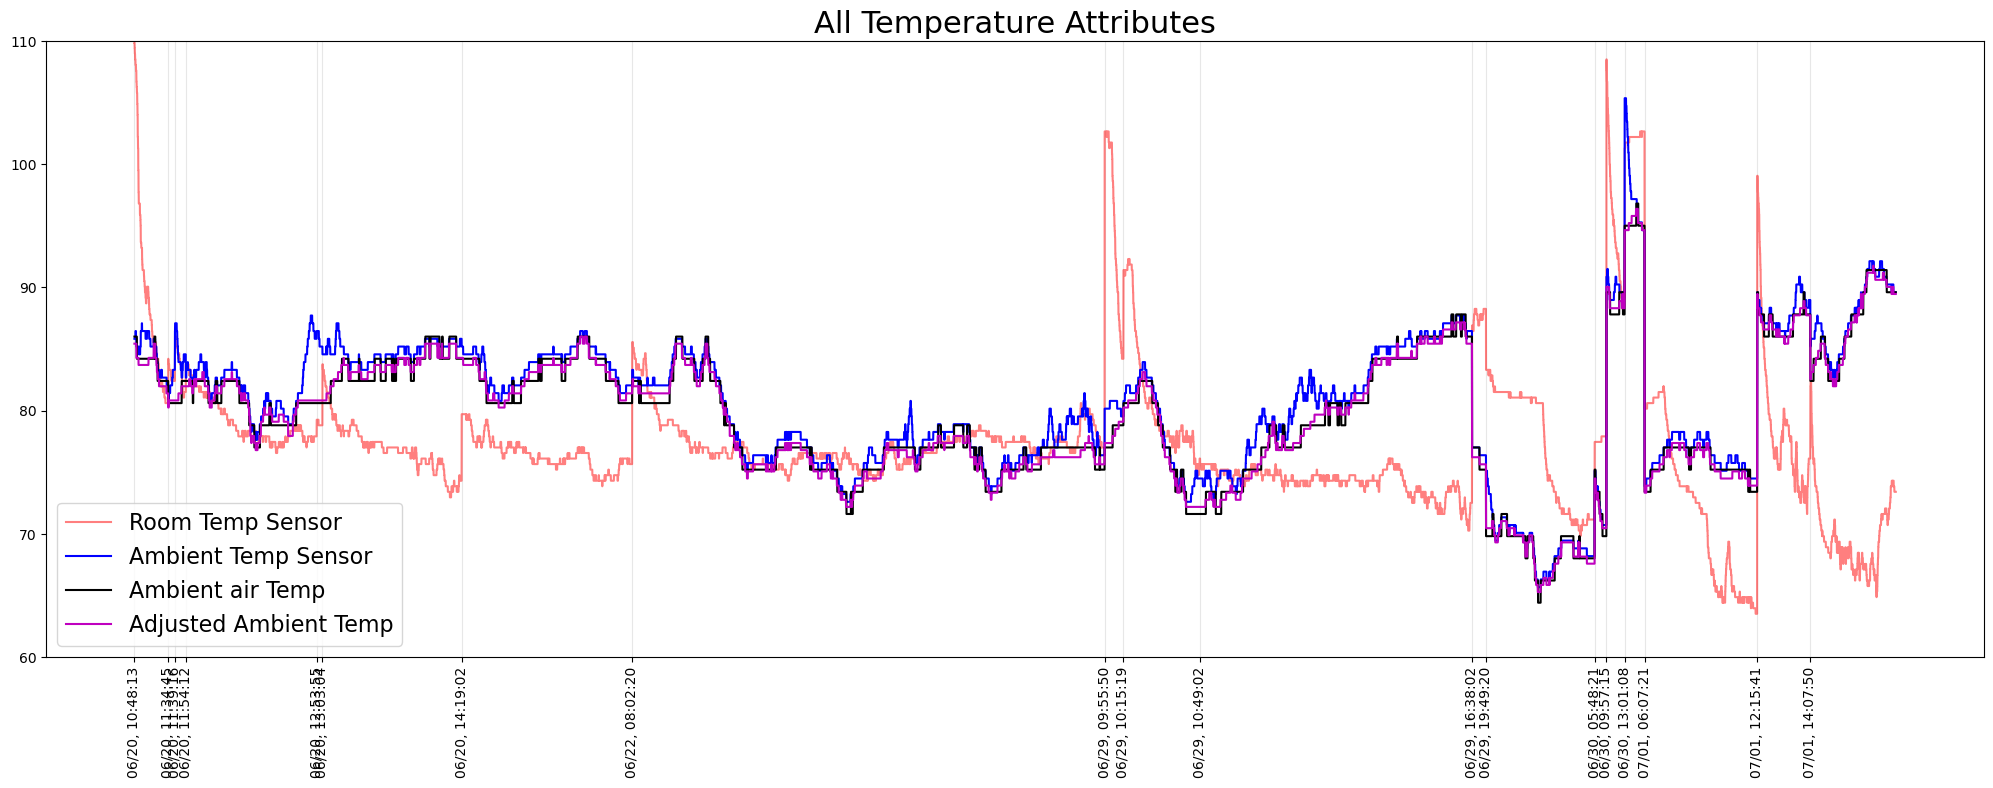

In [15]:
plt_1 = plt.figure(figsize=(25, 8))
plt.xticks(indices, datetimes, rotation = 90)
plt.plot(df.index, df[['Room Temperature Sensor (°F)']], alpha=0.5, color='r', label='Room Temp Sensor')
plt.plot(df.index, df[['Ambient Temperature Sensor (°F)']], color='b', label='Ambient Temp Sensor')
plt.plot(df.index, df[['Ambient air temperature (°F)']], color='k', label='Ambient air Temp')
plt.plot(df.index, df[['Adjusted Ambient Temperature (°F)']], color='m', label='Adjusted Ambient Temp')
plt.ylim(60,110)
plt.title('All Temperature Attributes', fontsize='22')
plt.legend(fontsize=16)
plt.grid(True, axis='x', alpha=.3)
plt.show()
#plt_1.savefig("./plots/temps.png", bbox_inches='tight') 

*Adjusted Ambient Temp seems to be the most well rounded feature*

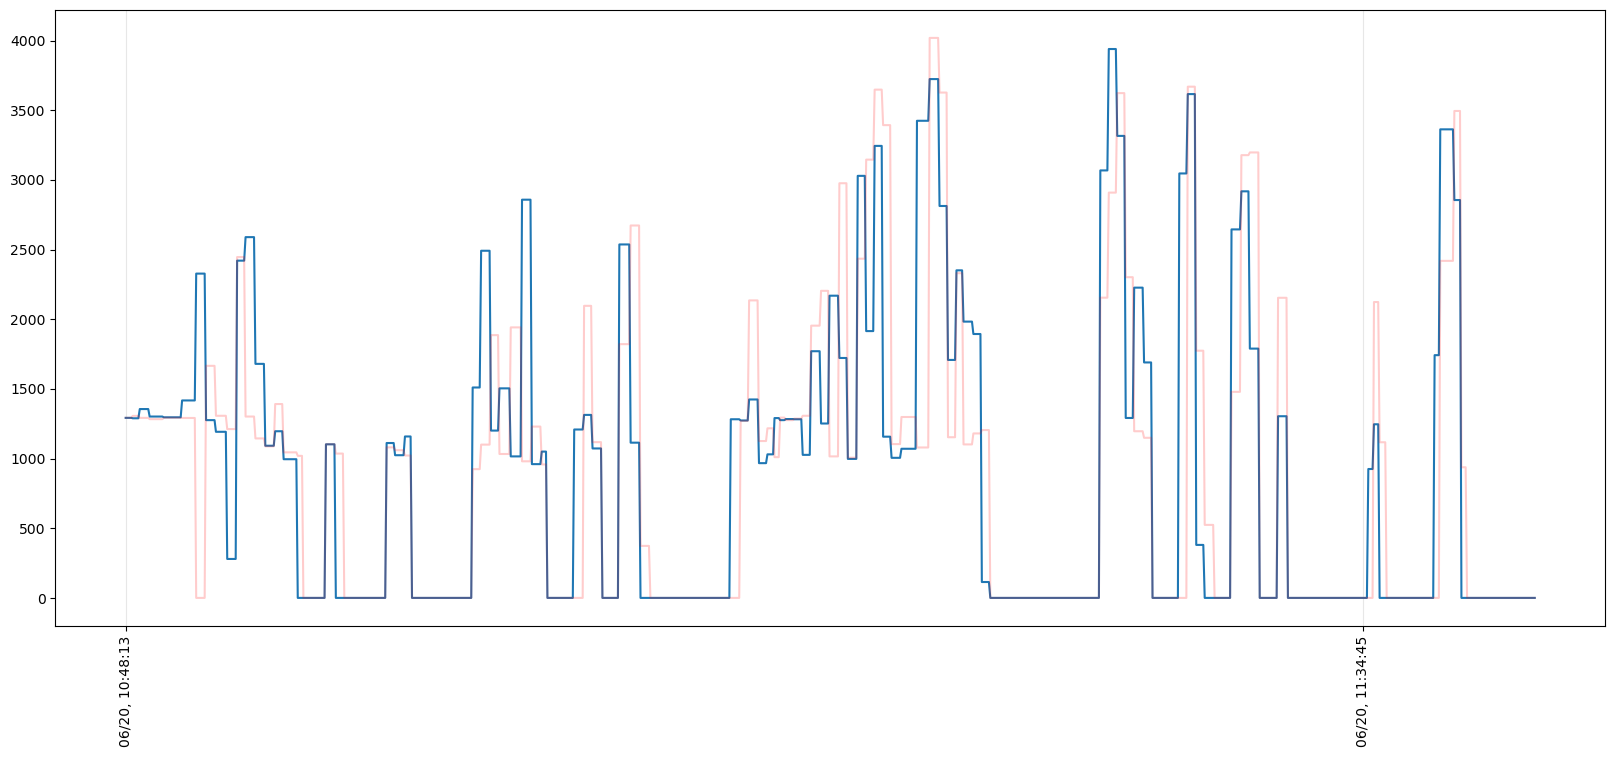

In [16]:
plt.figure(figsize = (20,8))
plt.xticks(indices, datetimes, rotation = 90)
plt.plot(df.index[:1000], df.loc[0:999, 'Engine Speed (RPM)'])
plt.plot(df.index[:1000], df.loc[0:999, 'Engine RPM (RPM)'], alpha = 0.2, color='r')
plt.grid(True, axis='x', alpha=.3)
plt.show()

*These are pretty similar, we dicided to use Engine Speed (RPM)*

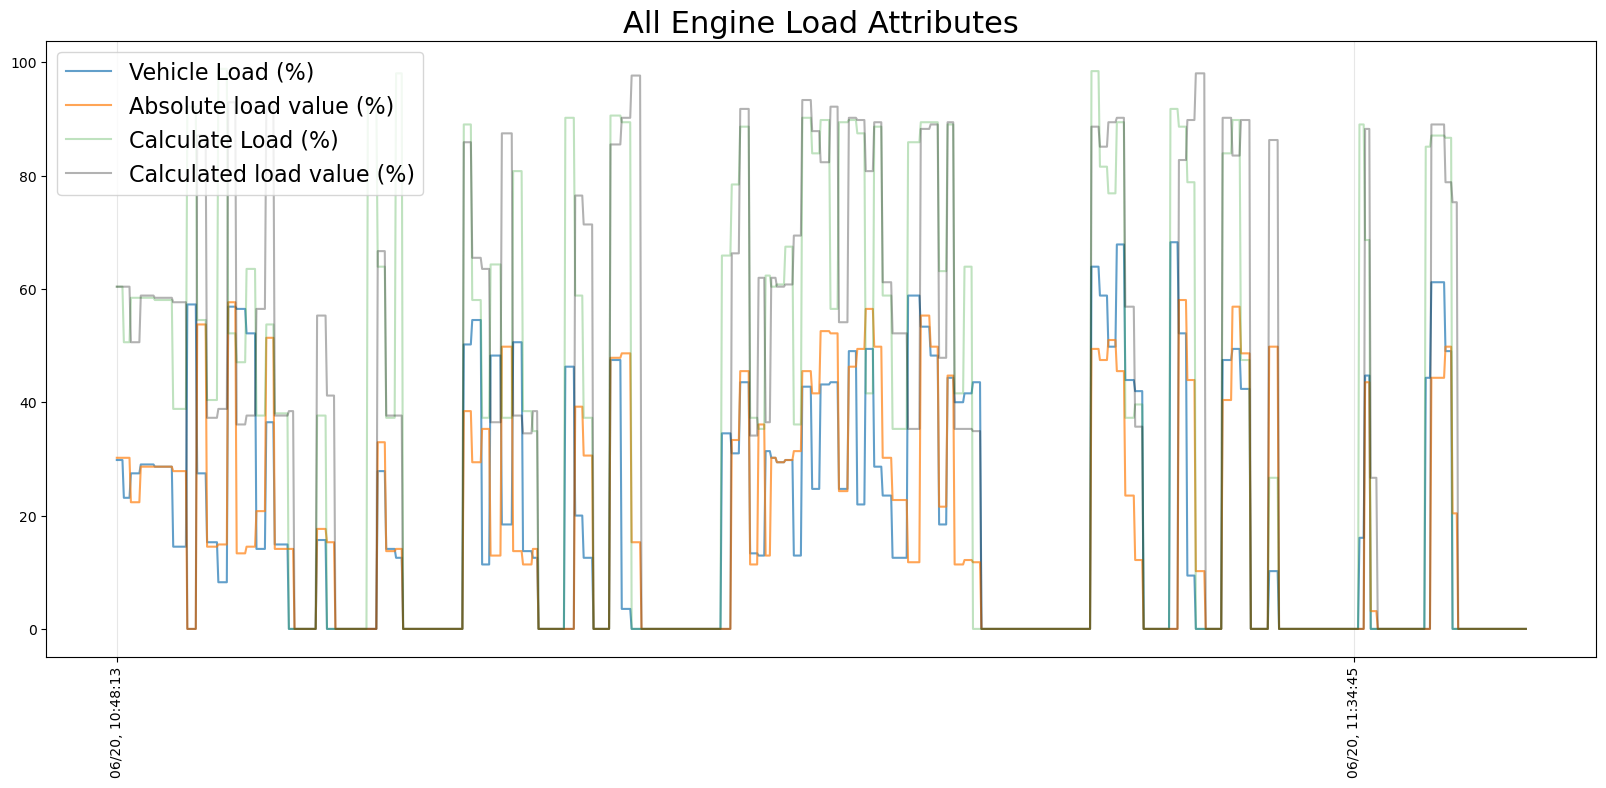

In [17]:
plt.figure(figsize = (20,8))
plt.xticks(indices, datetimes, rotation = 90)
plt.plot(df.index[:1000], df.loc[0:999, 'Vehicle Load (%)'], alpha=.7, label='Vehicle Load (%)')
plt.plot(df.index[:1000], df.loc[0:999, 'Absolute load value (%)'], alpha=.7, label='Absolute load value (%)')
plt.plot(df.index[:1000], df.loc[0:999, 'Calculate Load (%)'], alpha=.3, label='Calculate Load (%)')
plt.plot(df.index[:1000], df.loc[0:999, 'Calculated load value (%)'], alpha=.3, color='k', label='Calculated load value (%)')

plt.legend(fontsize=16)
plt.title('All Engine Load Attributes', fontsize='22')
plt.grid(True, axis='x', alpha=.3)

plt.savefig("./plots/eng_loads.png", bbox_inches='tight')
plt.show()

*They all follow similar trends. The calculated features seem to vary from 0 to 100. Keeping a calculated and a non calculated feature would be best*

## A/C vs various features

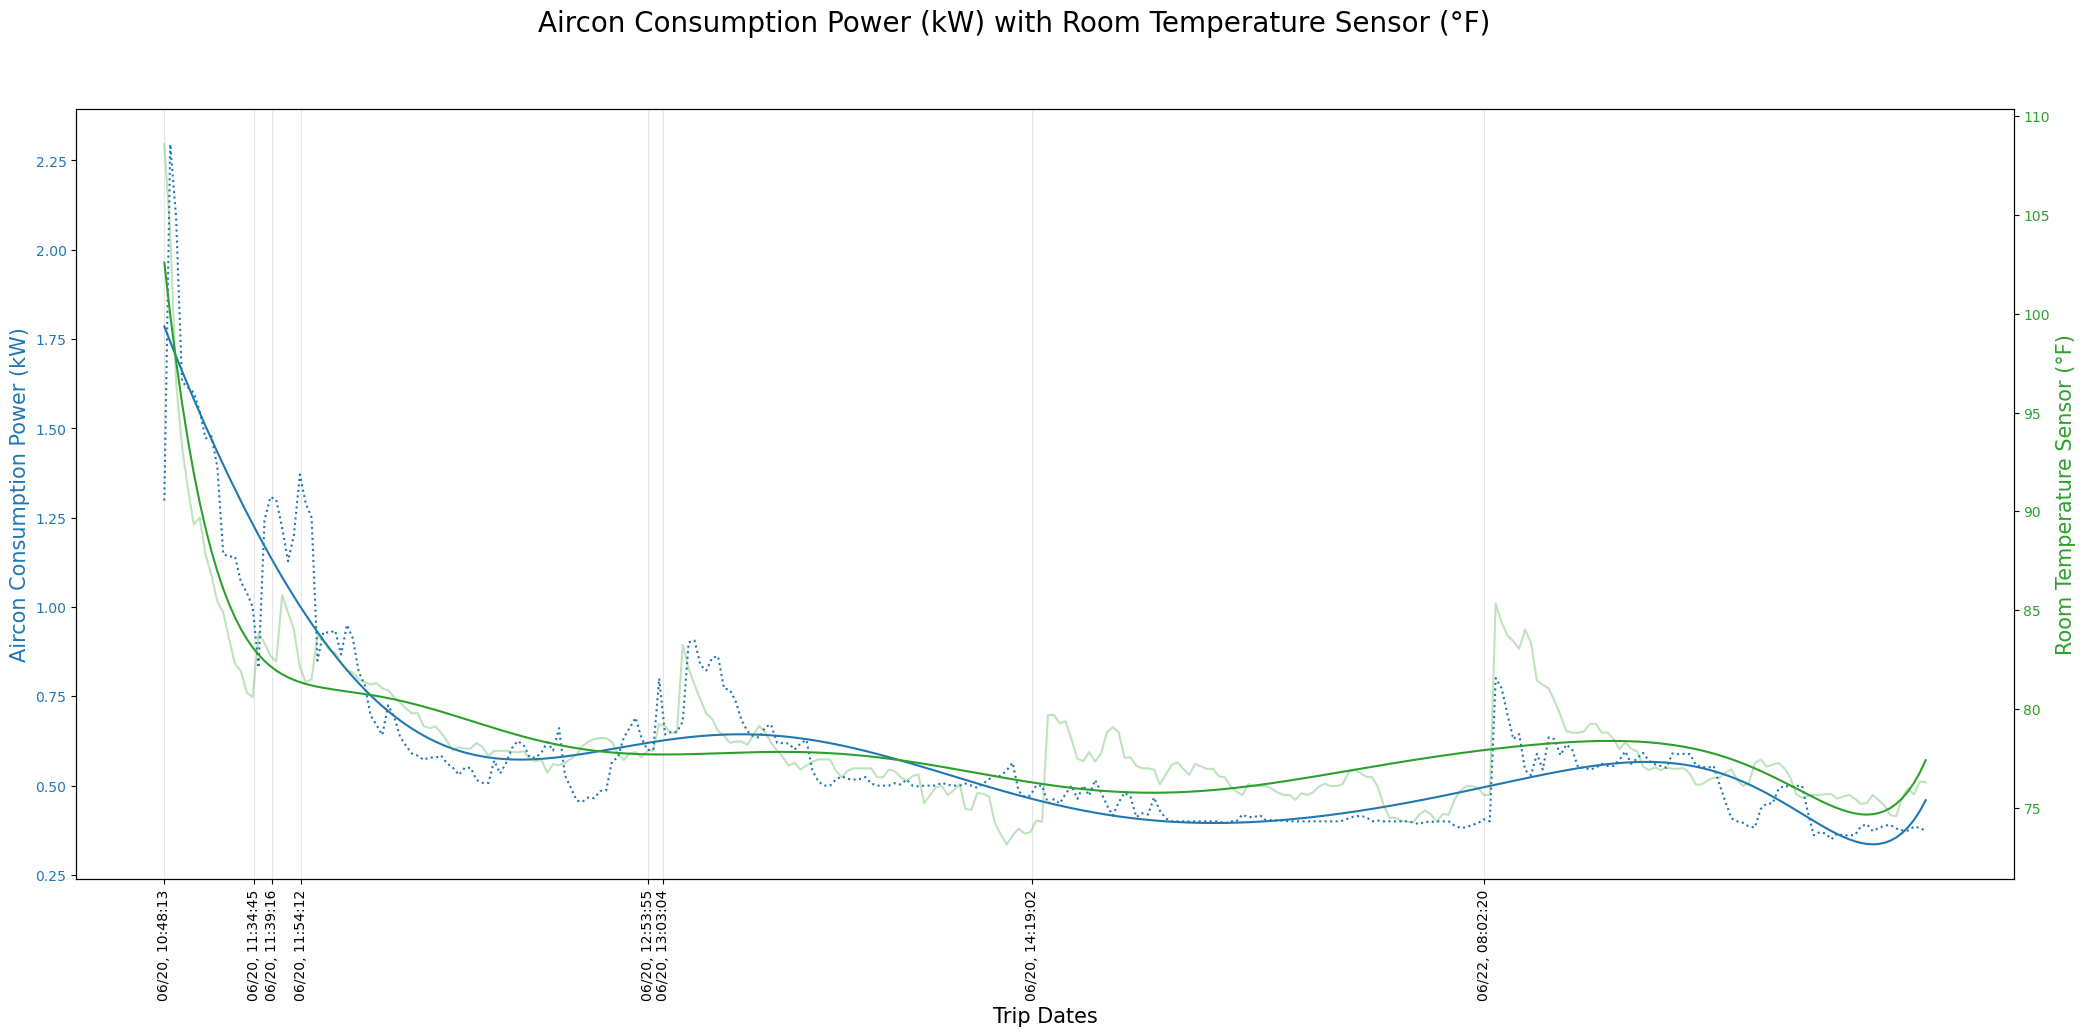

In [18]:
fig, ax1 = plt.subplots(figsize = (25, 10))

x = df_1min.index[:300]
y1 = df_1min['Aircon Consumption Power (kW)'][:300]
y2 = df_1min['Room Temperature Sensor (°F)'][:300]

# date ticks
ax1.set_xticks(df_1min_indices, datetimes, fontsize = 10, rotation = 90)
fig.suptitle(f'{y1.name} with {y2.name}', fontsize = 20)
ax1.set_xlabel('Trip Dates', fontsize = 15)
ax1.grid(True, axis='x', alpha=.3)

# y1
color = 'tab:blue'
ax1.set_ylabel(y1.name, color = color, fontsize = 15)
ax1.plot(x, y1, color = color, linestyle = ':')
ax1.tick_params(axis ='y', labelcolor = color)

p = np.poly1d(np.polyfit(x, y1, 10)) # trendline
ax1.plot(x, p(x), color = color)

# y2
ax2 = ax1.twinx()
  
color = 'tab:green'
ax2.set_ylabel(y2.name, color = color, fontsize = 15)
ax2.plot(x, y2, color = color, alpha=0.3) #alpha=opacity
ax2.tick_params(axis ='y', labelcolor = color)

p = np.poly1d(np.polyfit(x, y2, 10))
ax2.plot(x, p(x), color = color)

plt.savefig("./plots/ac_vs_temp.png", bbox_inches='tight')

plt.show()

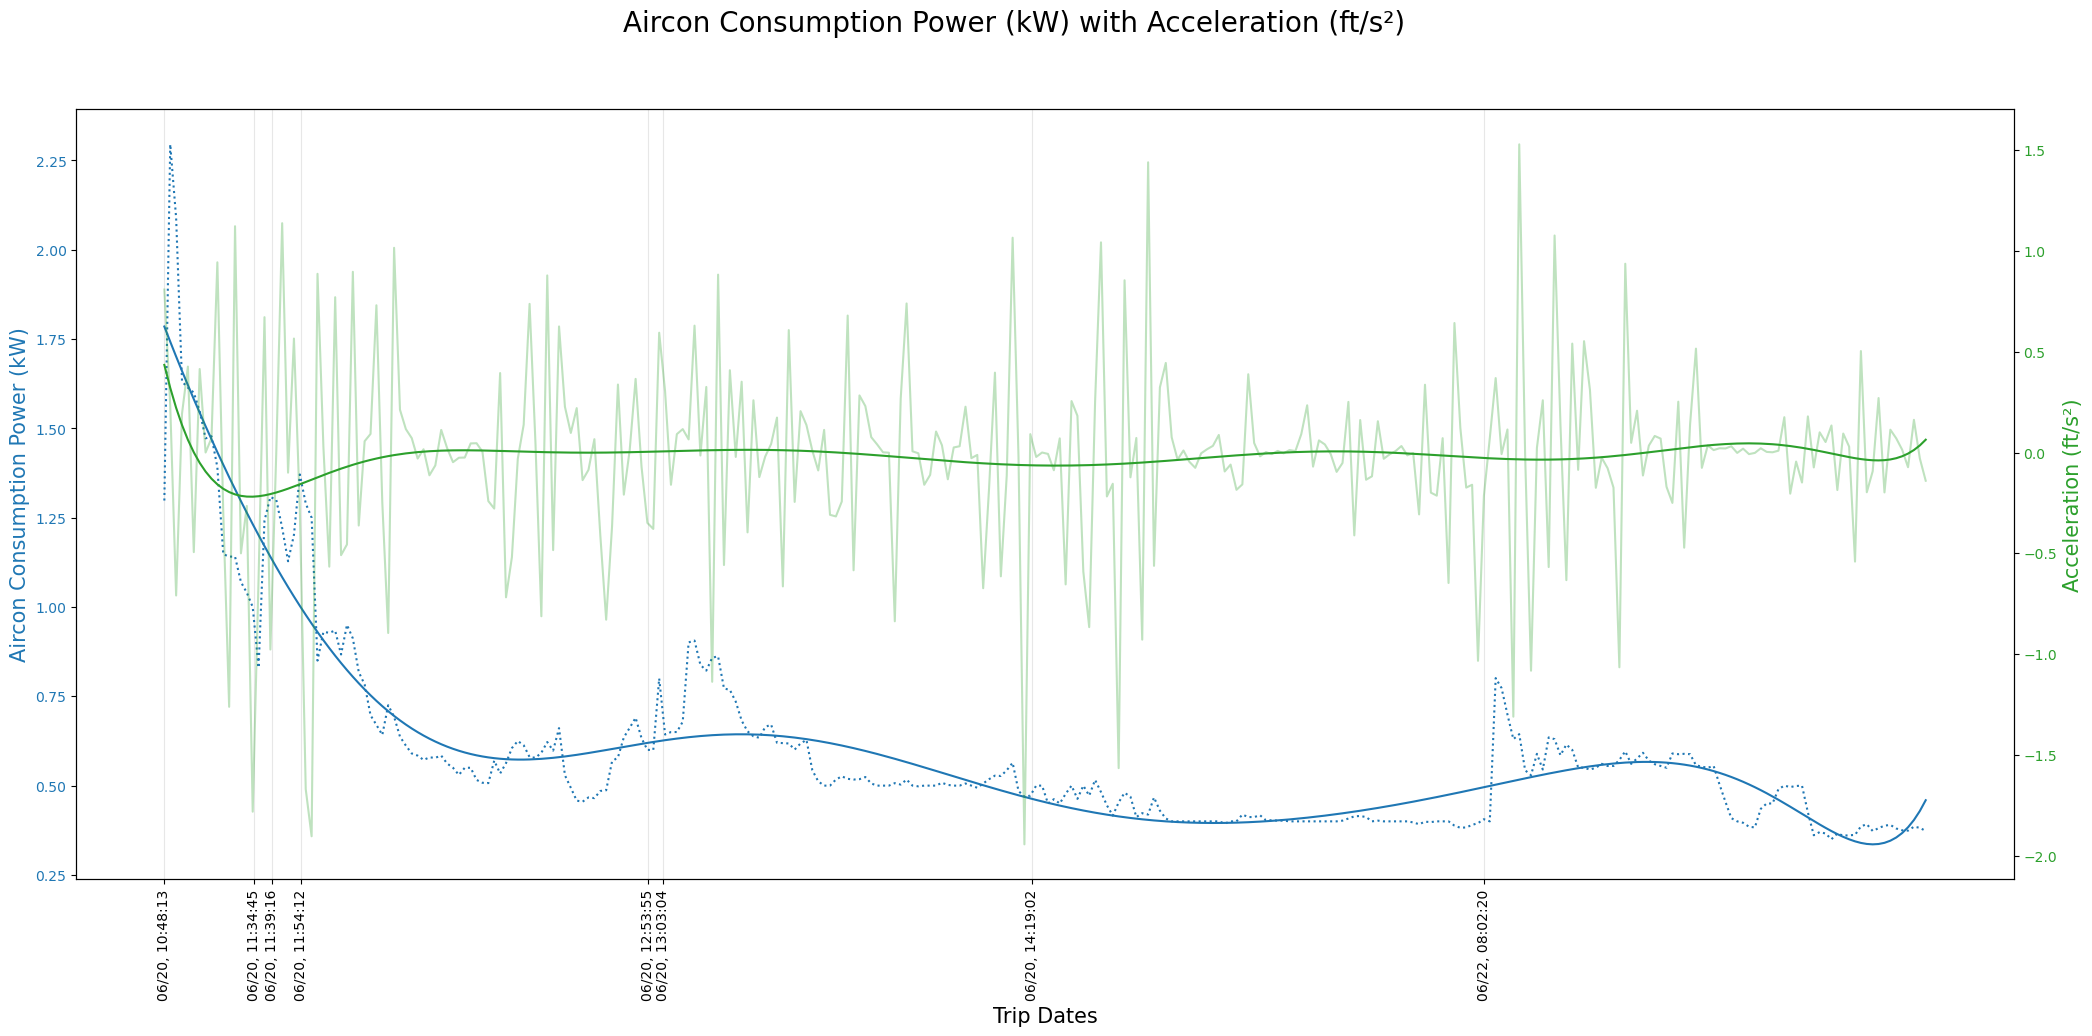

In [19]:
fig, ax1 = plt.subplots(figsize = (25, 10))

x = df_1min.index[:300]
y1 = df_1min['Aircon Consumption Power (kW)'][:300]
y2 = df_1min['Acceleration (ft/s²)'][:300]

# date ticks
fig.suptitle(f'{y1.name} with {y2.name}', fontsize = 20)
ax1.set_xlabel('Trip Dates', fontsize = 15)
ax1.set_xticks(df_1min_indices, datetimes, fontsize = 10, rotation = 90)
ax1.grid(True, axis='x', alpha=.3)

# y1
color = 'tab:blue'
ax1.set_ylabel(y1.name, color = color, fontsize = 15)
ax1.plot(x, y1, color = color, linestyle = ':')
ax1.tick_params(axis ='y', labelcolor = color)

p = np.poly1d(np.polyfit(x, y1, 10)) # trendline
ax1.plot(x, p(x), color = color)

# y2
ax2 = ax1.twinx()
  
color = 'tab:green'
ax2.set_ylabel(y2.name, color = color, fontsize = 15)
ax2.plot(x, y2, color = color, alpha=0.3) #alpha=opacity
ax2.tick_params(axis ='y', labelcolor = color)

p = np.poly1d(np.polyfit(x, y2, 10))
ax2.plot(x, p(x), color = color)

plt.savefig("./plots/ac_vs_accel.png", bbox_inches='tight')

plt.show()

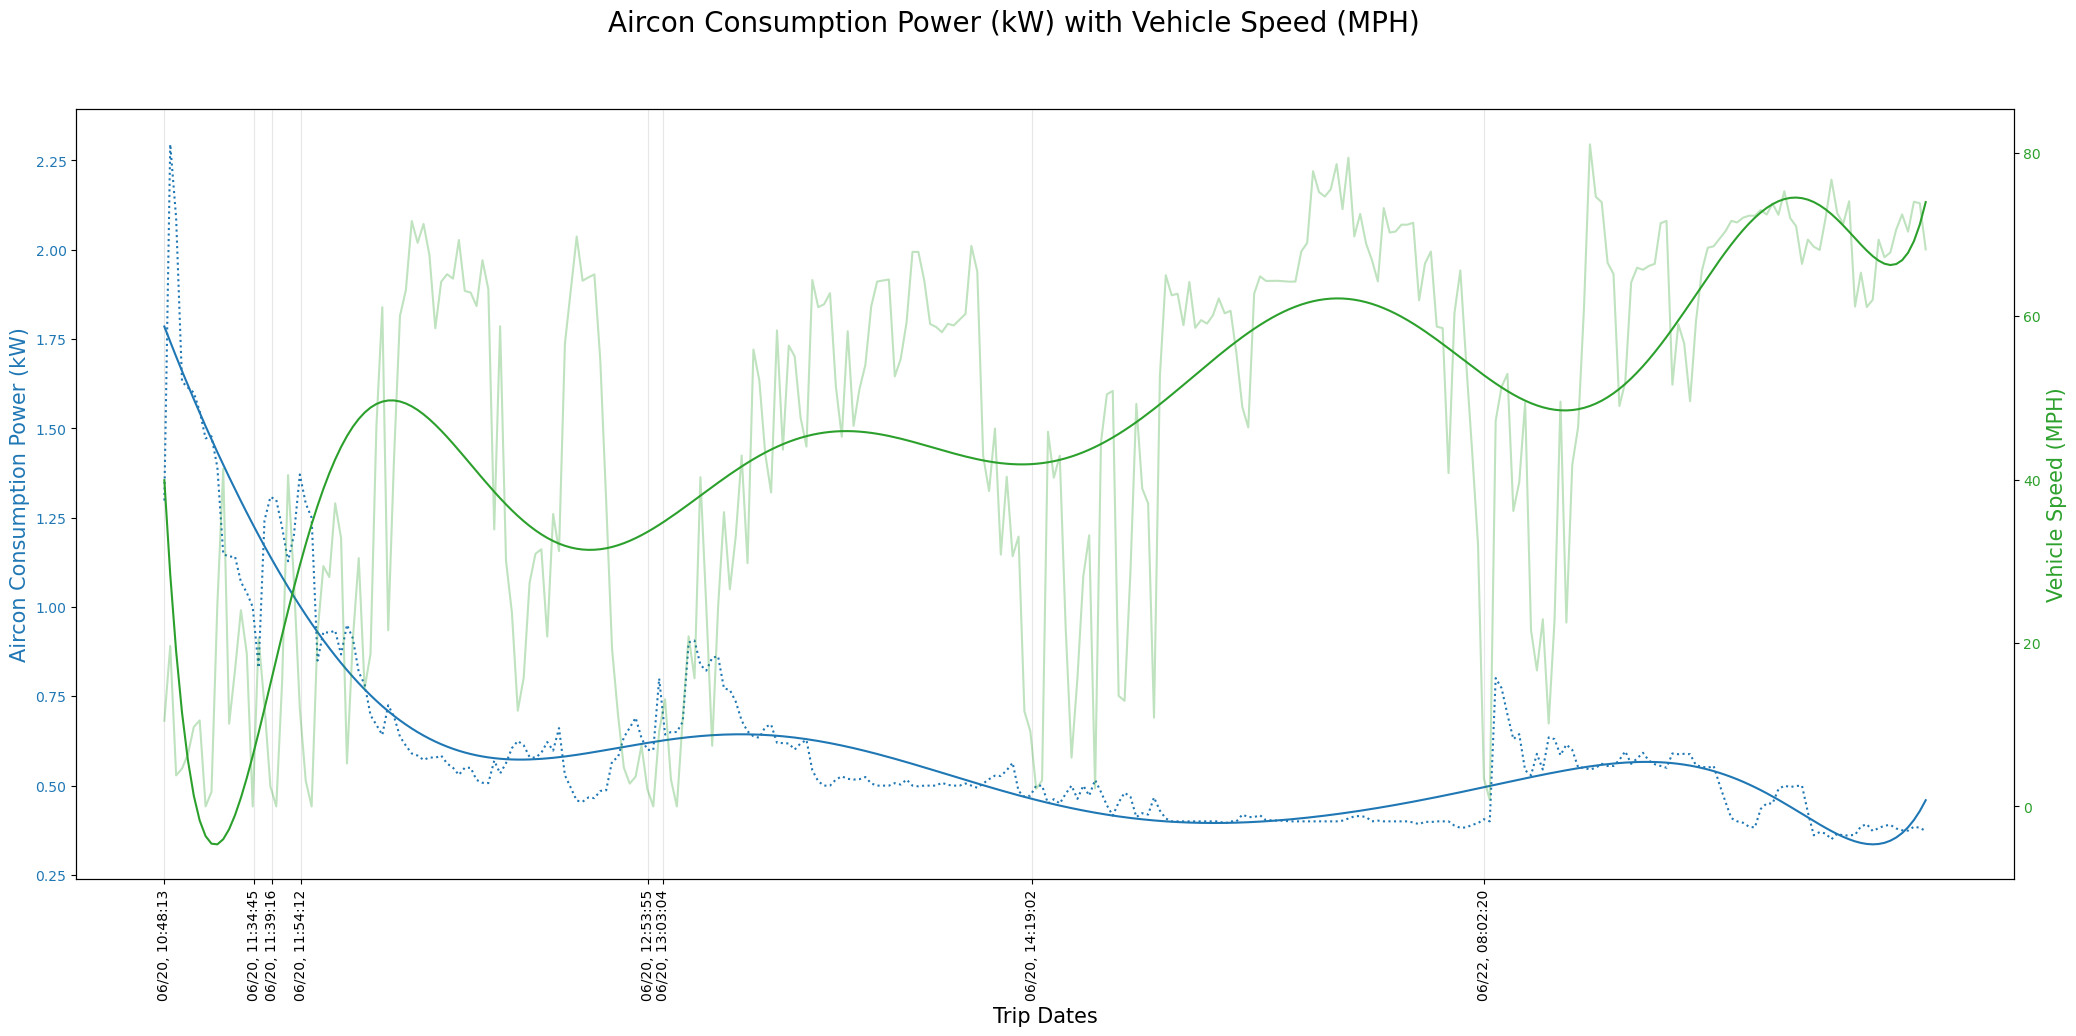

In [20]:
fig, ax1 = plt.subplots(figsize = (25, 10))

x = df_1min.index[:300]
y1 = df_1min['Aircon Consumption Power (kW)'][:300]
y2 = df_1min['Vehicle Speed (MPH)'][:300]

# date ticks
fig.suptitle(f'{y1.name} with {y2.name}', fontsize = 20)
ax1.set_xlabel('Trip Dates', fontsize = 15)
ax1.set_xticks(df_1min_indices, datetimes, fontsize = 10, rotation = 90)
ax1.grid(True, axis='x', alpha=.3)

# y1
color = 'tab:blue'
ax1.set_ylabel(y1.name, color = color, fontsize = 15)
ax1.plot(x, y1, color = color, linestyle = ':')
ax1.tick_params(axis ='y', labelcolor = color)

p = np.poly1d(np.polyfit(x, y1, 10)) # trendline
ax1.plot(x, p(x), color = color)

# y2
ax2 = ax1.twinx()
  
color = 'tab:green'
ax2.set_ylabel(y2.name, color = color, fontsize = 15)
ax2.plot(x, y2, color = color, alpha=0.3) #alpha=opacity
ax2.tick_params(axis ='y', labelcolor = color)

p = np.poly1d(np.polyfit(x, y2, 10))
ax2.plot(x, p(x), color = color)

plt.savefig("./plots/ac_vs_mph.png", bbox_inches='tight')

plt.show()

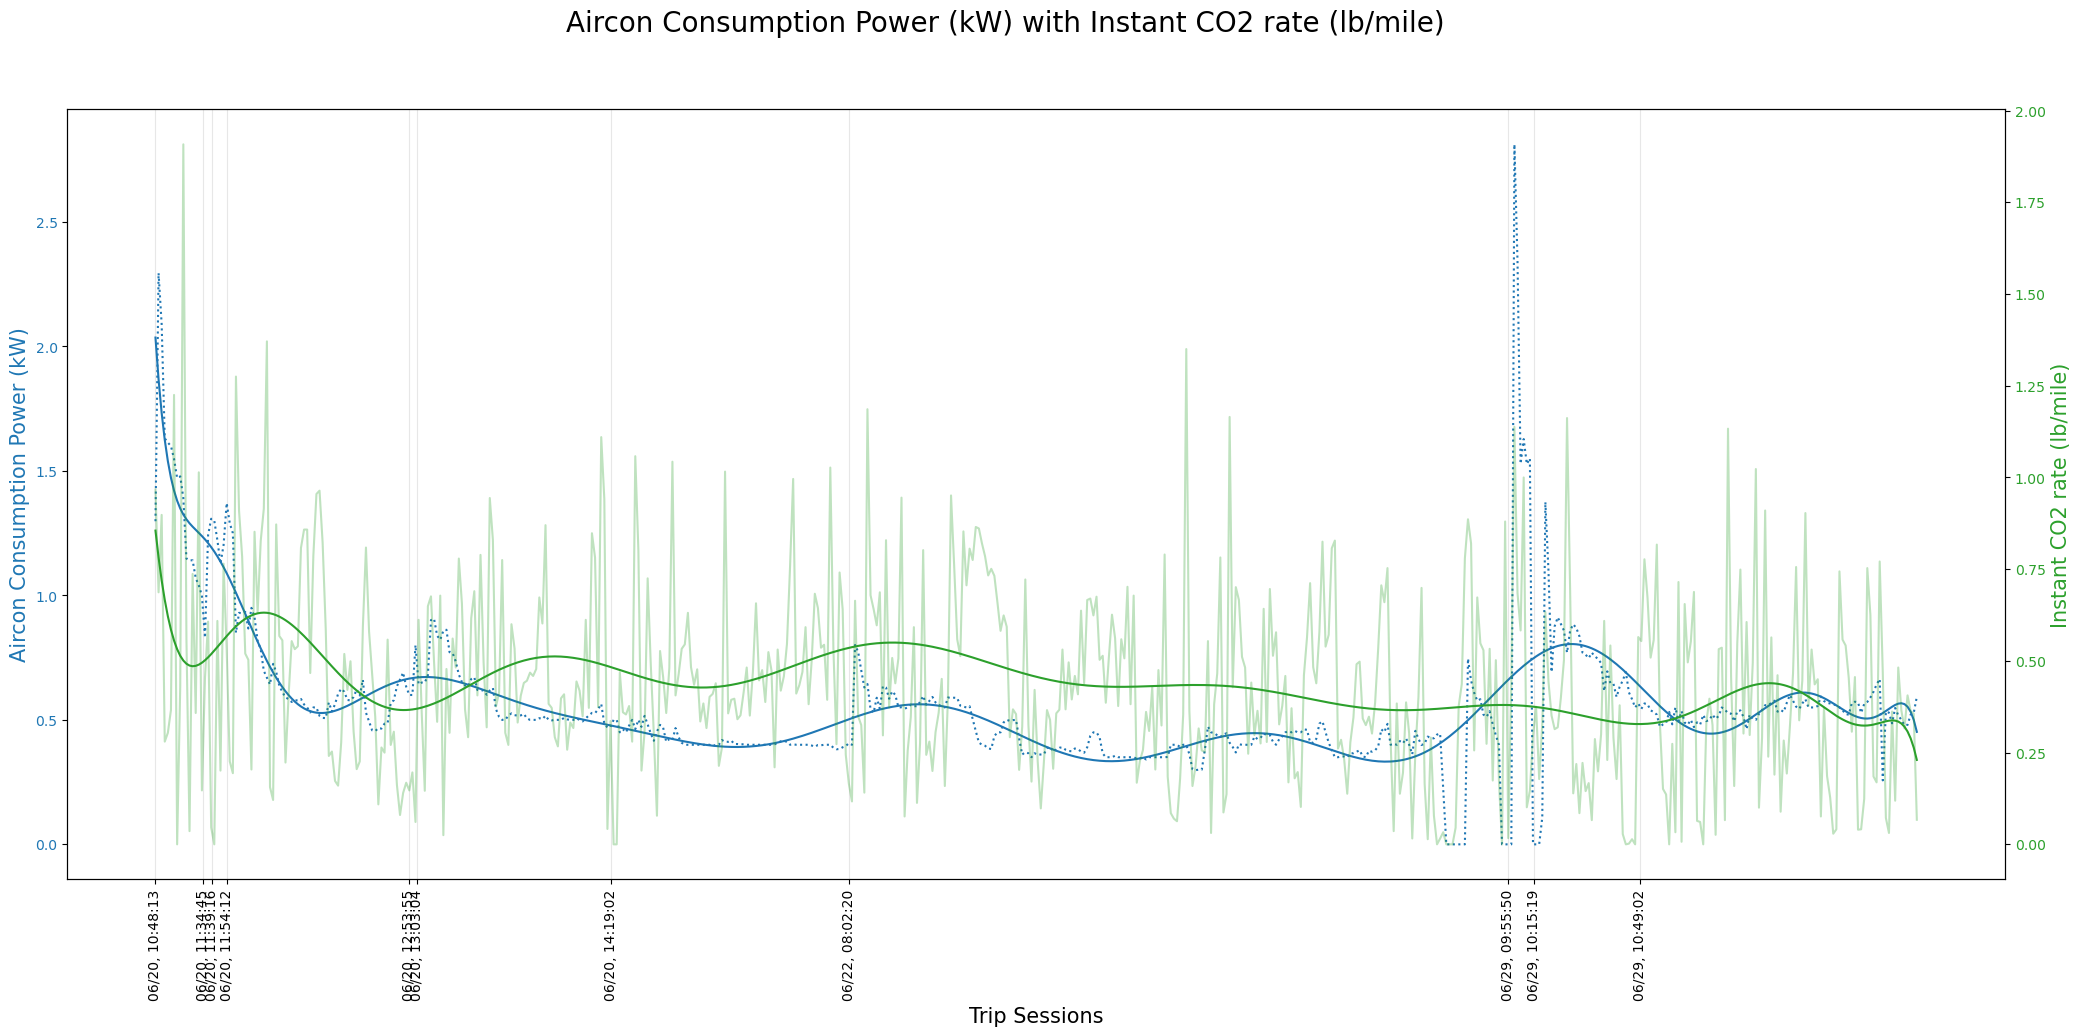

In [21]:
fig, ax1 = plt.subplots(figsize = (25, 10))

x = df_1min.index[:570]
y1 = df_1min['Aircon Consumption Power (kW)'][:570]
y2 = df_1min['Instant CO2 rate (lb/mile)'][:570]

# date ticks
fig.suptitle(f'{y1.name} with {y2.name}', fontsize = 20)
ax1.set_xlabel('Trip Sessions', fontsize = 15)
ax1.set_xticks(df_1min_indices, datetimes, fontsize = 10, rotation = 90)
ax1.grid(True, axis='x', alpha=.3)

# y1
color = 'tab:blue'
ax1.set_ylabel(y1.name, color = color, fontsize = 15)
ax1.plot(x, y1, color = color, linestyle = ':')
ax1.tick_params(axis ='y', labelcolor = color)

p = np.poly1d(np.polyfit(x, y1, 17)) # trendline
ax1.plot(x, p(x), color = color)

# y2
ax2 = ax1.twinx()
  
color = 'tab:green'
ax2.set_ylabel(y2.name, color = color, fontsize = 15)
ax2.plot(x, y2, color = color, alpha=0.3) #alpha=opacity
ax2.tick_params(axis ='y', labelcolor = color)

p = np.poly1d(np.polyfit(x, y2, 17))
ax2.plot(x, p(x), color = color)

plt.savefig("./plots/ac_vs_co2.png", bbox_inches='tight')

plt.show()